[[208 209 210 ... 100  99  98]
 [206 208 208 ...  99  98  97]
 [201 203 203 ...  98  97  96]
 ...
 [820 816 814 ... 966 966 970]
 [823 819 815 ... 971 969 965]
 [822 816 813 ... 972 971 969]]


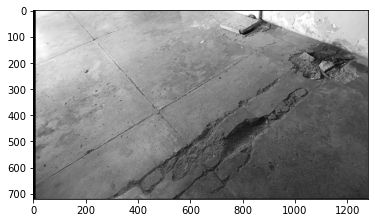

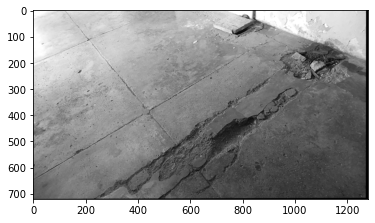

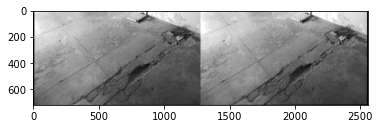

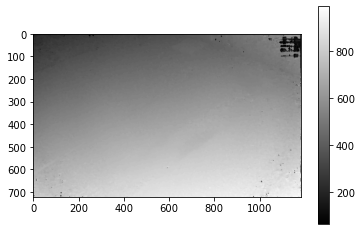

In [2]:
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

max_disparity = 96

H1 = np.array([[ 1.00047384e+00, -9.21142380e-04 , 1.05547668e+01],
 [-8.98002546e-04 , 9.98893992e-01, -5.28518968e-01],
 [ 7.41705741e-07, -3.17840628e-06 , 1.00062402e+00]])

H2 = np.array([[ 1.00499352e+00 , 2.38408626e-03 ,-9.01707400e+00],
 [ 2.31503605e-03 , 1.00108968e+00, -3.93138454e+00],
 [ 7.67580780e-06 , 3.18005952e-06 , 9.93872447e-01]])

left_image = cv2.imread('left_image1.png')
right_image = cv2.imread('rightt_image1.png')

left_image_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_image_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

left_img_rect = cv2.warpPerspective(left_image_gray, H1, left_image_gray.shape[::-1],
                                    cv2.INTER_CUBIC +
                                    cv2.WARP_FILL_OUTLIERS +
                                    cv2.WARP_INVERSE_MAP)

right_img_rect = cv2.warpPerspective(right_image_gray, H2, right_image_gray.shape[::-1],
                                    cv2.INTER_CUBIC +
                                    cv2.WARP_FILL_OUTLIERS +
                                    cv2.WARP_INVERSE_MAP)
lz_rectified = cv2.hconcat([left_img_rect, right_img_rect])

stereoProcessor = cv2.StereoSGBM_create(
            minDisparity=5,
            numDisparities=60,
            blockSize=5,
            P1=50, # 250
            P2=800, # 500
            disp12MaxDiff=-5,
            mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY
        )

# win_size = -2
# min_disp =-2
# max_disp =0
# num_disp =70 # Needs to be divisible by 16
# stereoProcessor = cv2.StereoSGBM_create(
#     minDisparity=min_disp,
#     numDisparities=num_disp,
#     blockSize=5,
#     uniquenessRatio=5,
#     speckleWindowSize=10,
#     speckleRange=10,
#     disp12MaxDiff=10,
#     P1=10,
#     P2=700,
#     preFilterCap = 10,
#     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
# )

# win_size = 2
# min_disp =-2
# max_disp = 5
# num_disp =8  # Needs to be divisible by 16
# stereoProcessor = cv2.StereoSGBM_create(
#     minDisparity=min_disp,
#     numDisparities=num_disp,
#     blockSize=3,
#     uniquenessRatio=5,
#     speckleWindowSize=400,
#     speckleRange=200,
#     disp12MaxDiff=1,
#     P1=100,
#     P2=1000,
#     preFilterCap = 20,
#     mode=cv2.STEREO_SGBM_MODE_SGBM_3WAY,
# )

disparity = stereoProcessor.compute(left_img_rect, right_img_rect)

disparity = disparity[0:disparity.shape[0], max_disparity:disparity.shape[1]]

height = disparity.shape[0]
width = disparity.shape[1]
print(disparity)

plt.imshow(left_img_rect, "gray")
plt.show()
plt.imshow(right_img_rect,"gray")
plt.show()
plt.imshow(lz_rectified,"gray")
plt.show()
plt.imshow(disparity, "gray")
plt.colorbar()
plt.show()


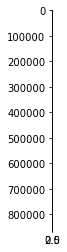

In [3]:
#3D Reprojection
image_centre_h = height/2
image_centre_w = width/2

''' Projects points from 2d to 3d using disparity to calculate Z coordinates'''

points = []

f = 800.74853515625
B = 0.075

height1, width1 = disparity.shape[:2]

# assume a minimal disparity of 2 pixels is possible to get Zmax
# and then get reasonable scaling in X and Y output

#Zmax = ((f * B) / 2)
a=0
x3d=[]
y3d=[]
z3d=[]

for y in range(height1): # 0 - height is the y axis index
    for x in range(width1): # 0 - width is the x axis index

        # if we have a valid non-zero disparity
        if (disparity[y,x] > 0):

            # calculate corresponding 3D point [X, Y, Z]

            # stereo lecture - slide 22 + 25

            Z = (f * B) / disparity[y,x]

            X = ((x - image_centre_w) * Z) / f
            Y = ((y - image_centre_h) * Z) / f

            # add to points
            x3d.append(X)
            y3d.append(Y)
            z3d.append(Z)

#             if(left_img_rect.size > 0):
#                 points.append([X,Y,Z,left_img_rect[y,x]])
#             else:
            points.append([X,Y,Z])
X1=np.reshape(x3d,(height1 , width1))
Y1=np.reshape(y3d,(height1 , width1))
Z1=np.reshape(z3d,(height1 , width1))
# print(x3d)
# print(y3dZ
# print(z3d)
plt.imshow(points,"gray")
plt.show()

In [4]:
x1 = X1[40,1]
y1 = Y1[40,1]
z1 = Z1[40,1]
x2 = X1[190,102]
y2 = Y1[190,102]
z2 = Z1[190,102]
x3 = X1[300,300]
y3 = Y1[300,300]
z3 = Z1[300,300]
x4 = X1[450,580]
y4 = Y1[450,580]
z4 = Z1[450,580]
x5 = X1[610,810]
y5 = Y1[610,810]
z5 = Z1[610,810]
x6 = X1[713,1000]
y6 = Y1[713,1000]
z6 = Z1[713,1000]
print(x1 , y1,z1)
print(x2 , y2,z2)
print(x3 , y3,z3)
print(x4 , y4,z4)
Sx = x1+x2+x3+x4+x5+x6
Sz = z1+z2+z3+z4+z5+z6
Sx2 = x1*x1+x2*x2+x3*x3+x4*x4+x5*x5+x6*x6
Sxz = x1*z1 + x2*z2 + x3*z3 + x4*z4 + x5*z5 + x6*z6
Sz2 = z1*z1+z2*z2+z3*z3+z4*z4+z5*z5+z6*z6
Sx3 = x1*x1*x1+x2*x2*x2+x3*x3*x3+x4*x4*x4+x5*x5*x5+x6*x6*x6
Sx2z = (x1*x1)*z1+(x2*x2)*z2+(x3*x3)*z3+(x4*x4)*z4+(x5*x5)*z5+(x6*x6)*z6
Sxz2 = x1*(z1*z1)+x2*(z2*z2)+x3*(z3*z3)+x4*(z4*z4)+x5*(z5*z5)+x6*(z6*z6)
Sz3 = z1*z1*z1+z2*z2*z2+z3*z3*z3+z4*z4*z4+z5*z5*z5+z6*z6*z6
Sx4 = x1*x1*x1*x1+x2*x2*x2*x2+x3*x3*x3*x3+x4*x4*x4*x4+x5*x5*x5*x5+x6*x6*x6*x6
Sx3z2 = (x1*x1*x1)*(z1*z1)+(x2*x2*x2)*(z2*z2)+(x3*x3*x3)*(z3*z3)+(x4*x4*x4)*(z4*z4)+(x5*x5*x5)*(z5*z5)+(x6*x6*x6)*(z6*z6)
Sx3z = (x1*x1*x1)*(z1)+(x2*x2*x2)*(z2)+(x3*x3*x3)*(z3)+(x4*x4*x4)*(z4)+(x5*x5*x5)*(z5)+(x6*x6*x6)*(z6)
Sx2z2 = (x1*x1)*(z1*z1)+(x2*x2)*(z2*z2)+(x3*x3)*(z3*z3)+(x4*x4)*(z4*z4)+(x5*x5)*(z5*z5)+(x6*x6)*(z6*z6)
Sxz3 = x1*(z1*z1*z1)+x2*(z2*z2*z2)+x3*(z3*z3*z3)+x4*(z4*z4*z4)+x5*(z5*z5*z5)+x6*(z6*z6*z6)
Sz4 = z1*z1*z1*z1+z2*z2*z2*z2+z3*z3*z3*z3+z4*z4*z4*z4+z5*z5*z5*z5+z6*z6*z6*z6
print()
print(Sx)
print(Sz)
print(Sx2)
print(Sxz)
print(Sz2)
print()
print(Sx3)
print(Sx2z)
print(Sxz2)
print(Sz3)
print()
print(Sx4)
print(Sx3z2)
print(Sx3z)
print(Sx2z2)
print(Sxz3)
print(Sz4)

Sy = y1+y2+y3+y4+y5+y6
Sxy = x1*y1 + x2*y2 + x3*y3 + x4*y4 + x5*y5 + x6*y6
Szy = z1*y1 + z2*y2 + z3*y3 + z4*y4 + z5*y5 + z6*y6
Sx2y = (x1*x1)*y1+(x2*x2)*y2+(x3*x3)*y3+(x4*x4)*y4+(x5*x5)*y5+(x6*x6)*y6
Sxyz = (x1*y1)*z1+(x2*y2)*z2+(x3*y3)*z3+(x4*y4)*z4+(x5*y5)*z5+(x6*y6)*z6
Sz2y = y1*(z1*z1)+y2*(z2*z2)+y3*(z3*z3)+y4*(z4*z4)+y5*(z5*z5)+y6*(z6*z6)
print()
print(Sy)
print(Sxy)
print(Szy)
print(Sx2y)
print(Sxyz)
print(Sz2y)

-0.18781779661016948 -0.10169491525423728 0.25447517007084214
-0.0930379746835443 -0.03227848101265822 0.15204086110561707
-0.04124293785310734 -0.008474576271186439 0.11310007558704095
-0.0013062409288824382 0.009796806966618287 0.08716420919697931

-0.2706904437042271
0.7431415351665187
0.047125129837763735
-0.06316010398242437
0.11757269125806839

-0.007456227273839308
0.010585140335188831
-0.014610259507831683
0.02273920939199032

0.0013235766561108236
-0.0004483597232217418
-0.001813403520856785
0.002512913497220023
-0.003466333596638634
0.004992826904332382

-0.08162625889106723
0.023834028445490915
-0.027429200246553268
-0.003840515942220212
0.005449216760565476
-0.007130477854923827


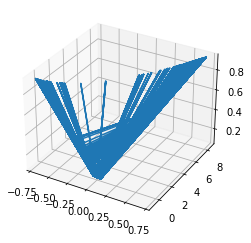

In [5]:
#plotting using traditional calculation
from mpl_toolkits import mplot3d
%matplotlib inline
yn=[]
for i in range(0,len(x3d)):
    y2049 = 0.06958 + -0.45284*x3d[i] + -0.89187*z3d[i] +  5.10759*x3d[i]*x3d[i] + 7.65875*x3d[i]*z3d[i] + 2.41661*z3d[i]*z3d[i]
    yn.append(y2049)
    
Y2=np.reshape(yn,(height1 , width1))
ax = plt.axes(projection='3d')
ax.plot3D(x3d, yn, z3d)

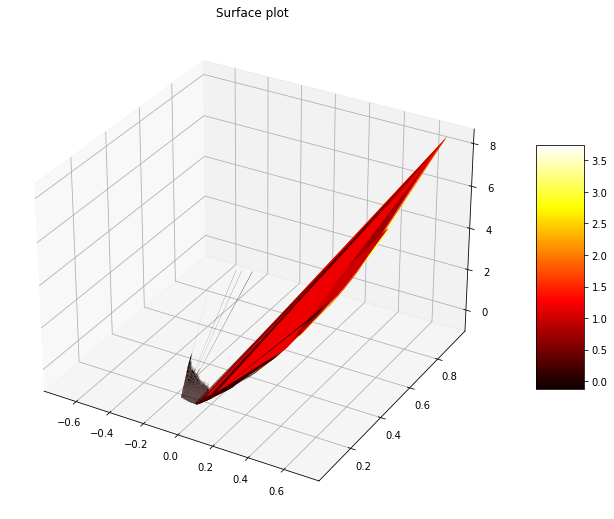

In [12]:
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating color map
my_cmap = plt.get_cmap('hot')
 
# Creating plot
surf = ax.plot_surface(X1, Z1, Y2,
                       cmap = my_cmap,
                       edgecolor ='none')
 
fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)
 
ax.set_title('Surface plot')
# show plot
# ax.view_init(180,180)
plt.show()

In [7]:
#finding coeff using ordinary least squares on sklearn
from sklearn import linear_model
reg = linear_model.LinearRegression()
# reg.precision(2)
reg.fit([[6,Sx,Sz,Sx2,Sxz,Sz2],[Sx,Sx2,Sxz,Sx3,Sx2z,Sxz2],[Sz,Sxz,Sz2,Sx2z,Sxz2,Sz3],[Sx2,Sx3,Sx2z,Sx4,Sx3z2,Sx3z],[Sxz,Sx2z,Sxz2,Sx3z,Sx2z2,Sxz3],[Sz2,Sxz2,Sz3,Sx2z2,Sxz3,Sz4]], [[Sy],[Sxy],[Szy],[Sx2y],[Sxyz],[Sz2y]])
# LinearRegression()
amat = reg.coef_
yn1=[]
for i in range(0,len(x3d)):
    y2049k =  amat[0,0]+ amat[0,1]*x3d[i] + amat[0,2]*z3d[i] +  amat[0,3]*x3d[i]*x3d[i] + amat[0,4]*x3d[i]*z3d[i] + amat[0,5]*z3d[i]*z3d[i]
    yn1.append(y2049k)
print(amat)
Y3=np.reshape(yn1,(height1 , width1))

[[ 0.04520459  0.19944681 -0.38322065 -0.22058776  0.13394147  0.04064058]]


C:\Users\Admin\AppData\Local\Temp/ipykernel_532/1897733354.py:7: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf1, shrink=0.5, aspect=5)


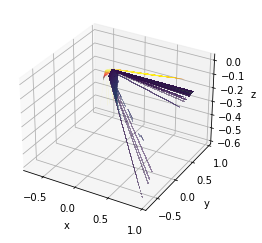

In [16]:
#plot ordinary least square map
from matplotlib import cm
ax = plt.axes(projection ='3d')
ax.plot_surface(Z1,X1,Y3,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
surf1 = ax.plot_surface(X1, Z1, Y3,
                       cmap = my_cmap,
                       edgecolor ='none')
fig.colorbar(surf1, shrink=0.5, aspect=5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

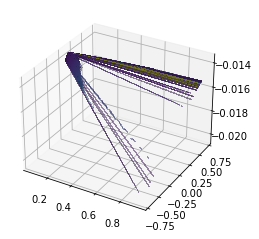

[[-0.01332892  0.00318675 -0.00386472 -0.00051105  0.00071552 -0.00093577]]


In [14]:
#plot using ridge regression
reg1 = linear_model.Ridge(alpha=.5)
reg1.fit([[6,Sx,Sz,Sx2,Sxz,Sz2],[Sx,Sx2,Sxz,Sx3,Sx2z,Sxz2],[Sz,Sxz,Sz2,Sx2z,Sxz2,Sz3],[Sx2,Sx3,Sx2z,Sx4,Sx3z2,Sx3z],[Sxz,Sx2z,Sxz2,Sx3z,Sx2z2,Sxz3],[Sz2,Sxz2,Sz3,Sx2z2,Sxz3,Sz4]], [[Sy],[Sxy],[Szy],[Sx2y],[Sxyz],[Sz2y]])
amat1=reg1.coef_
# reg1.intercept_
yn2=[]
for i in range(0,len(x3d)):
    y2049A =  amat1[0,0]+ amat1[0,1]*x3d[i] + amat1[0,2]*z3d[i] +  amat1[0,3]*x3d[i]*x3d[i] + amat1[0,4]*x3d[i]*z3d[i] + amat1[0,5]*z3d[i]*z3d[i]
    yn2.append(y2049A)
Y4=np.reshape(yn2,(height1 , width1))
from matplotlib import cm
ax = plt.axes(projection ='3d')
ax.plot_surface(Z1,X1,Y4,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
print(amat1)

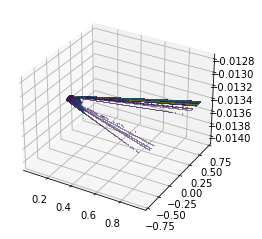

In [15]:
#plot using random weights for weighted least squares
sample_weight = np.ones(6) * 6
sample_weight[-2:] *= 30
regr = linear_model.LinearRegression()
regr.fit([[6,Sx,Sz,Sx2,Sxz,Sz2],[Sx,Sx2,Sxz,Sx3,Sx2z,Sxz2],[Sz,Sxz,Sz2,Sx2z,Sxz2,Sz3],[Sx2,Sx3,Sx2z,Sx4,Sx3z2,Sx3z],[Sxz,Sx2z,Sxz2,Sx3z,Sx2z2,Sxz3],[Sz2,Sxz2,Sz3,Sx2z2,Sxz3,Sz4]], [[Sy],[Sxy],[Szy],[Sx2y],[Sxyz],[Sz2y]], sample_weight)
amat2=regr.coef_
# reg1.intercept_
yn3=[]
for i in range(0,len(x3d)):
    y2049R =  amat2[0,0]+ amat2[0,1]*x3d[i] + amat2[0,2]*z3d[i] +  amat2[0,3]*x3d[i]*x3d[i] + amat2[0,4]*x3d[i]*z3d[i] + amat2[0,5]*z3d[i]*z3d[i]
    yn3.append(y2049A)
Y5=np.reshape(yn3,(height1 , width1))
from matplotlib import cm
ax = plt.axes(projection ='3d')
ax.plot_surface(Z1,X1,Y5,linewidth=0, antialiased=False, shade = True, alpha = 0.5, facecolors=cm.viridis(Z1))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()